# Capstone Project for General Assembly Data Science Bootcamp
## Kickstarter 2017 Dataset Analysis and Predicting Succesful Projects

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

In [13]:
kick = pd.read_csv('ks-projects-201801.csv')

In [24]:
kick.shape

(378661, 15)

In [14]:
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [15]:
kick.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [20]:
kick['deadline'] = pd.to_datetime(kick.deadline)
kick['launched'] = pd.to_datetime(kick.launched)
kick.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [21]:
kick.apply(pd.isnull).agg('sum')

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [26]:
# choose number of bins ~= sqrt(number of movies)
kick.usd_pledged_real.describe()

count    3.786610e+05
mean     9.058924e+03
std      9.097334e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.243300e+02
75%      4.050000e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

In [29]:
import math
math.sqrt(378661)

615.3543694490191

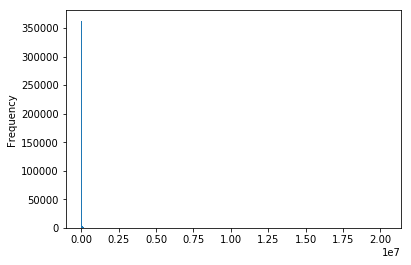

In [37]:
kick.usd_pledged_real.plot(kind='hist', bins=615);

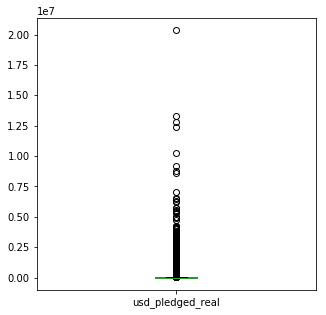

In [32]:
kick.usd_pledged_real.plot(kind='box',figsize=(5,5));

In [34]:
kick.category.value_counts()

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Printing               238
Makerspaces            238
M

In [35]:
kick.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

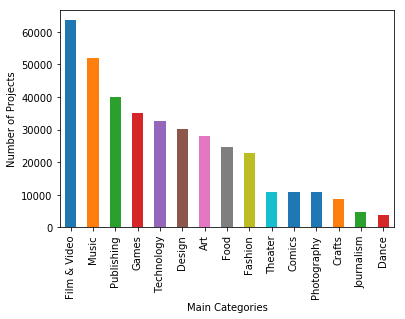

In [36]:
top_cat = kick.main_category.value_counts().plot(kind='bar');
top_cat.set_xlabel("Main Categories");
top_cat.set_ylabel("Number of Projects");

In [ ]:
find_cont = ["NOT RATED","APPROVED","PASSED","GP"]
movies.content_rating = movies.content_rating.replace(find_cont,"UNRATED")
# Very important to always verify! 
#  Is this what you'd expect compared to the run above?
movies.content_rating.value_counts()

In [ ]:

#movies.plot(x="duration", y='star_rating', kind='scatter', figsize=(15,7))
sns.lmplot(x="duration", y='star_rating', data=movies);

In [ ]:
movies.groupby('genre').duration.mean()

In [ ]:
# BOXPLOT content rating and duration plot
movies.boxplot(column='duration', by='content_rating', 
               figsize=(11,5), sym='k.');

plt.xlabel('rating');
plt.ylabel('duration');

In [ ]:
movies_sorted = movies.sort_values('star_rating', ascending=False)
movies_sorted.groupby('genre').head(1)[DISPLAY_COLS]

In [ ]:
genre_counts = movies.genre.value_counts()

genre_counts
relevant_genres = ['Drama', 'Comedy', 'Action', 'Crime', 
                   'Biography', 'Adventure', 'Animation', 
                   'Horror', 'Mystery']

genre_mask = movies['genre'].isin(relevant_genres)
print(movies[genre_mask].groupby('genre')['star_rating'].mean())

In [ ]:
kick.groupby('usd_pledged_real').apply(lambda column: column.sum()/(column != 0).sum())